<a href="https://colab.research.google.com/github/moawinds/machine-learning/blob/main/pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Nama dataframe kita adalah df yang berisi data dari kc_house_data.csv.
# Features yang digunakan adalah 'bedrooms','bathrooms','sqft_living','grade','price' dan 'yr_built'
df = pd.read_csv('kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])

In [3]:
# Melihat 5 baris teratas dari data
# Independent variable (x) adalah bedrooms, bathrooms, sqft_living, grade, yr_built
# Dependent variable (y) adalah price
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [4]:
# Mengetahui jumlah kolom dan baris dari data
# Data kita mempunyai 6 kolom (features) dengan 21613 baris
df.shape


(21613, 6)

In [8]:
# Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
# Dapat dilihat bahwa seluruh data sudah di dalam bentuk numerik
df.info()
from sklearn.metrics import mean_squared_error, mean_absolute_error


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [9]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [10]:
# 2. Load dataset
df = pd.read_csv('kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])
df.head()


,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [11]:
# 4. Bersihkan dan ubah data
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].replace(33, 3)

# Cek missing values
print(df.isnull().sum())


price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64


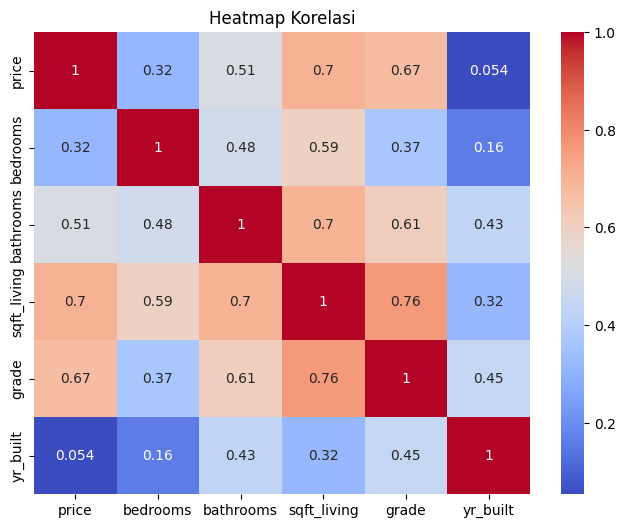

In [12]:
# 5. Visualisasi korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()


In [13]:
# 6. Split data untuk model
X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# 7. Buat dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)


In [15]:
# 8. Evaluasi model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.4f}")
print(f"MAE     : {mae:.2f}")
print(f"MSE     : {mse:.2f}")
print(f"RMSE    : {rmse:.2f}")


R2 Score: 0.6095
MAE     : 150296.24
MSE     : 59037127061.39
RMSE    : 242975.57


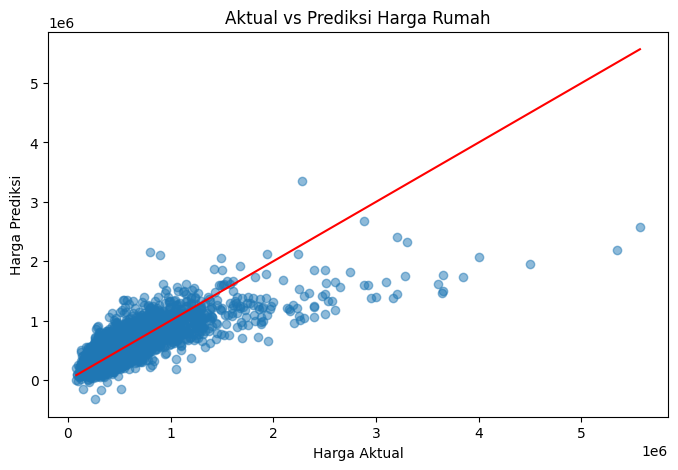

In [16]:
# 9. Visualisasi Hasil Prediksi
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Aktual vs Prediksi Harga Rumah")
plt.show()


In [17]:
# 10. Prediksi Contoh
# Prediksi harga rumah dengan 3 kamar tidur, 2 kamar mandi, 1800 sqft, grade 7, tahun 1990
sample = [[3, 2, 1800, 7, 1990]]
prediksi = model.predict(sample)
print(f"Prediksi harga rumah: ${prediksi[0]:,.2f}")


Prediksi harga rumah: $362,369.93


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
